<a href="https://colab.research.google.com/github/WilliamPoe/CSCI-290/blob/main/notebooks/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd

In [77]:
df = pd.read_csv("https://github.com/WilliamPoe/CSCI-290/raw/main/Data/ad_click_dataset.csv")

In [78]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [80]:
train_set.columns

Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')

In [81]:
train_set = train_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']]

In [82]:
test_set = test_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']]

In [83]:
X_train = train_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']]
y_train = train_set['click']

In [84]:
X_test = test_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']]
y_test = test_set['click']

Work on the stuff below

In [85]:
num_attributes = X_train.select_dtypes( include = ['float64']).columns
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [86]:
trf = [ ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
         ('Scaler', StandardScaler())]),
         num_attributes), ('cat', OneHotEncoder( handle_unknown='ignore' ), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [87]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=5))])

In [88]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.656875, 0.669375, 0.6475  , 0.66375 , 0.6625  ])

In [89]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=5))])

In [98]:
predictions = pipeline.predict( X_test )

In [99]:
cm = confusion_matrix(y_test, predictions)

In [100]:
cm

array([[  24,  666],
       [   3, 1307]])

[Text(0.41369047619047616, 0.9166666666666666, 'x[0] <= -2.294\ngini = 0.456\nsamples = 8000\nvalue = [2810, 5190]'),
 Text(0.13095238095238096, 0.75, 'x[7] <= 0.5\ngini = 0.278\nsamples = 42\nvalue = [35, 7]'),
 Text(0.047619047619047616, 0.5833333333333334, 'x[9] <= 0.5\ngini = 0.069\nsamples = 28\nvalue = [27, 1]'),
 Text(0.023809523809523808, 0.4166666666666667, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[18] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.047619047619047616, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.09523809523809523, 0.25, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11904761904761904, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.5833333333333334, 'x[4] <= 0.5\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.166666666666

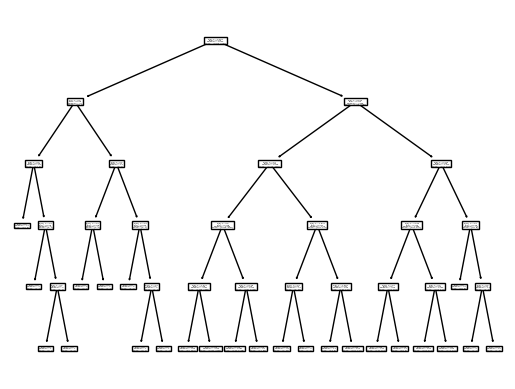

In [93]:
plot_tree( pipeline.named_steps['clf'])